0.4979271999999996
0.4570623020407655
0.4834767629626753
0.4981995453575844


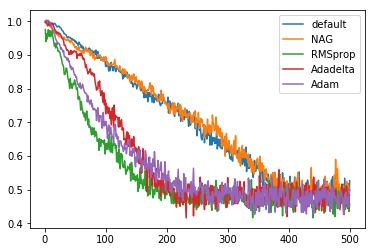

In [35]:
# write your code here
from sklearn.datasets import load_svmlight_file
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#定义cost函数c()
def c(x,y,w):
    if(y*(w*x.T)<1):
        return -y
    return 0

#Loss函数对w求导
def loss_derivatived(w,X_train,y_train,index):
    return (c(X_train[index],y_train[index],w))*X_train[index]

def shuffle_data_index(data_size):
    arr_index = []
    for i in range(data_size):
        arr_index.append(i)
    random.shuffle (arr_index)
    return arr_index


def testLoss(w, X_test, y_test):
    total_cost=0
    shuffled_arr = shuffle_data_index(y_test.size)
    for m in range(1000):
        index = shuffled_arr[m]
        cost = float(max(0,1-y_test[index]*(w*X_test[index].T)))
        total_cost += cost

    j = total_cost/(m+1)
    return j

def data_process():
    t_X,t_y=load_svmlight_file("./a9a.txt")
    t_X=t_X.todense()  
    t_X_row_num,t_X_column_num=shape(t_X)

    #在X矩阵中添加一列“1”
    ones_column = ones((t_X_row_num,1))
    t_X=hstack((ones_column,t_X))
    t_X_column_num = t_X[0].size

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( t_X, t_y, test_size=0.33, random_state=31)
    return X_train, X_test, y_train, y_test


def Classification_gradAscent(X_train, X_test, y_train, y_test,eta,maxCycles):
    t_X_column_num=X_train[0].size

    w = zeros((1,t_X_column_num))

    train_size = y_train.size
    test_size=y_test.size
    
    p_x = []
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        dl=loss_derivatived(w,X_train,y_train,index)
        w=w-eta*dl

        p_x.append(m+1)
        test_loss=testLoss(w, X_test, y_test)
        p_test_loss.append(test_loss)

    plt.plot(p_x, p_test_loss,label="default") 
#     print(p_test_loss[499])
    
def Classification_gradAscent_NAG(X_train, X_test, y_train, y_test,eta,maxCycles):
    t_X_column_num=X_train[0].size

    w = zeros((1,t_X_column_num))
    v = zeros((1,t_X_column_num))
    gamma=0.9
    
    train_size = y_train.size
    test_size=y_test.size
    
    p_x = []
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        dl=loss_derivatived(w-gamma*v,X_train,y_train,index)
        v=gamma*v+eta*dl
        w=w-eta*dl

        p_x.append(m+1)
        test_loss=testLoss(w, X_test, y_test)
        p_test_loss.append(test_loss)

    plt.plot(p_x, p_test_loss,label="NAG") 
    print(p_test_loss[499])
    

def Classification_gradAscent_RMSprop(X_train, X_test, y_train, y_test,eta,maxCycles):
    learning_rate=eta
    decay_rate=0.995
    
    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    r=0

    train_size = y_train.size
    test_size=y_test.size
    p_x=[]
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        dl=loss_derivatived(w,X_train,y_train,index)
        r=decay_rate*r+(1-decay_rate)*multiply(dl,dl)
        w=w-multiply(learning_rate/(np.sqrt(r)+1e-7),dl)
        
        p_x.append(m+1)
        p_test_loss.append(testLoss(w, X_test, y_test))

    plt.plot(p_x, p_test_loss,label="RMSprop") 
    print(p_test_loss[499])
    
    
def Classification_gradAscent_Adadelta(X_train, X_test, y_train, y_test,eta,maxCycles):
#     decay_rate=0.9
    decay_rate=0.9
    
    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    delta=0
    g=0
    e=0

    train_size = y_train.size
    test_size=y_test.size
    
    p_x = []
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        
        dl=loss_derivatived(w,X_train,y_train,index)
        g=decay_rate*g+(1-decay_rate)*multiply(dl,dl)
        e=decay_rate*e+(1-decay_rate)*multiply(delta,delta)
        delta=multiply(np.sqrt(e+1e-7)/(np.sqrt(g)+1e-7),dl)
        w=w-delta

        p_x.append(m+1)
        test_loss=testLoss(w, X_test, y_test)
        p_test_loss.append(test_loss)

    plt.plot(p_x, p_test_loss,label="Adadelta") 
    print(p_test_loss[499])
    
    
def Classification_gradAscent_Adam(X_train, X_test, y_train, y_test,eta,maxCycles):
    learning_rate=eta
    D1_decay_rate=0.9
    D2_decay_rate=0.995
    
    t_X_column_num=X_train[0].size
    w = zeros((1,t_X_column_num))
    s=0
    r=0
    
    train_size = y_train.size
    test_size=y_test.size
    
    p_x = []
    p_test_loss=[]

    shuffled_arr = shuffle_data_index(train_size)
    for m in range(maxCycles):
        index = shuffled_arr[m]
        dl=loss_derivatived(w,X_train,y_train,index)
        s=(D1_decay_rate*s+(1-D1_decay_rate)*dl)
        s1=s/(1-D1_decay_rate)
        r=(D2_decay_rate*r+(1-D2_decay_rate)*multiply(dl,dl))
        r1=r/(1-D2_decay_rate)
        w=w-multiply(learning_rate*s1,1/(np.sqrt(r1)+10**-8))

        p_x.append(m+1)
        test_loss=testLoss(w, X_test, y_test)
        p_test_loss.append(test_loss)

    plt.plot(p_x, p_test_loss,label="Adam") 
    plt.legend()
    print(p_test_loss[499])
    

def main():
    X_train, X_test, y_train, y_test=data_process()
#     eta = 0.000603
    eta = 0.0006
    maxCycles = 500
    Classification_gradAscent(X_train, X_test, y_train, y_test,eta,maxCycles)
    Classification_gradAscent_NAG(X_train, X_test, y_train, y_test,eta,maxCycles)
    Classification_gradAscent_RMSprop(X_train, X_test, y_train, y_test,eta,maxCycles)
    Classification_gradAscent_Adadelta(X_train, X_test, y_train, y_test,eta,maxCycles)
    Classification_gradAscent_Adam(X_train, X_test, y_train, y_test,eta,maxCycles)


main()




